In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
import warnings

%matplotlib inline

In [2]:
warnings.filterwarnings("ignore")

In [3]:
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
from pandas.plotting import autocorrelation_plot

In [5]:
df = pd.read_excel(r'/usr/local/codePro/bookCode/hands-on-time-series-analylsis-python-master/Data/India_Exchange_Rate_Dataset.xls',
                  index_col = 0,
                  parse_dates = True)

In [49]:
def printFunction(data, title=""):
    plt.figure(figsize = (15, 6))
    plt.plot(data)
    plt.title(title, fontsize=16) 
    plt.xlabel('Year')
    plt.ylabel('EXINUS')
    plt.show()

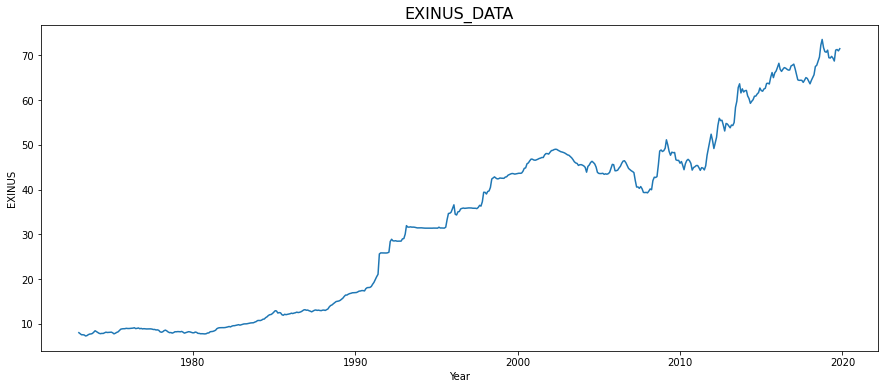

In [7]:
printFunction(df.loc[:, 'EXINUS'], 'EXINUS_DATA')

In [8]:
EXINUS_cycle, EXINUS_trend = hpfilter(df.loc[:,'EXINUS'], lamb = 1600)

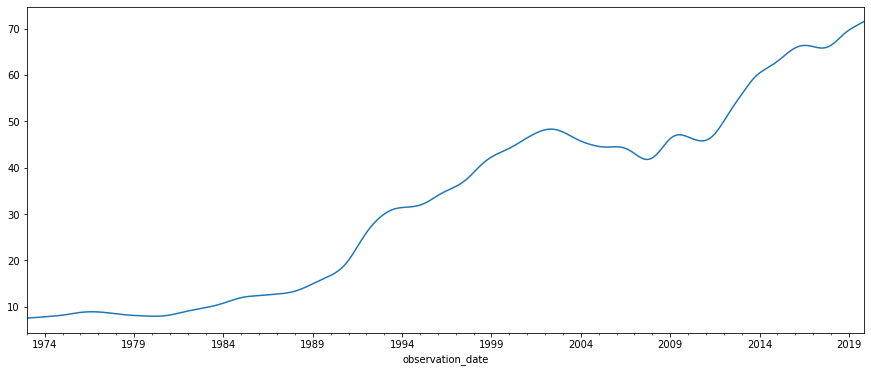

In [9]:
EXINUS_trend.plot(figsize=(15, 6)).autoscale(axis = 'x', tight = True)

In [10]:
df.head()

,EXINUS
observation_date,
1973-01-01,8.0041
1973-02-01,7.7538
1973-03-01,7.5465
1973-04-01,7.5462
1973-05-01,7.4927


In [11]:
diff = df.loc[:, "EXINUS"].diff()

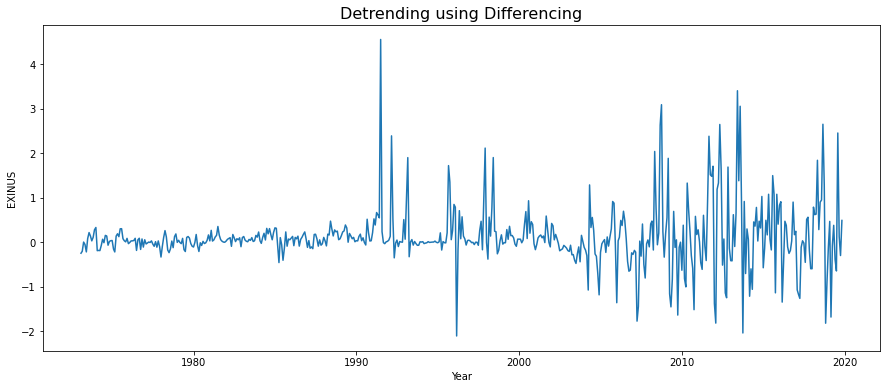

In [12]:
printFunction(diff, 'Detrending using Differencing')

In [13]:
detrended = signal.detrend(df.loc[:,'EXINUS'].values)

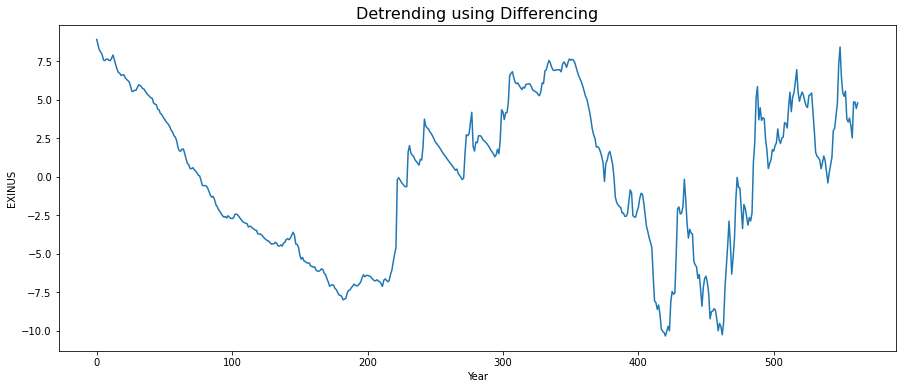

In [14]:
printFunction(detrended, 'Detrending using Differencing')

In [15]:
df.loc[:,'trend']= EXINUS_trend

In [16]:
df.head()

,EXINUS,trend
observation_date,,
1973-01-01,8.0041,7.571541
1973-02-01,7.7538,7.589325
1973-03-01,7.5465,7.607379
1973-04-01,7.5462,7.626077
1973-05-01,7.4927,7.645753


In [17]:
df.loc[:,"deTrend"] = df.loc[:,'EXINUS'] - df.loc[:,'trend']

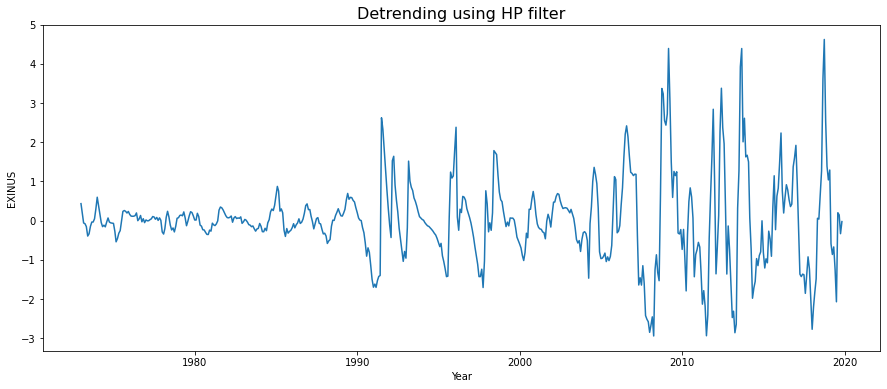

In [18]:
printFunction(df.loc[:,'deTrend'], 'Detrending using HP filter')

In [19]:
df.columns

Index(['EXINUS', 'trend', 'deTrend'], dtype='object')

In [20]:
df.loc[:,'month'] = df.index.month

In [21]:
df.loc[:,'year'] = df.index.year

In [22]:
years = df.loc[:,'year'].unique()

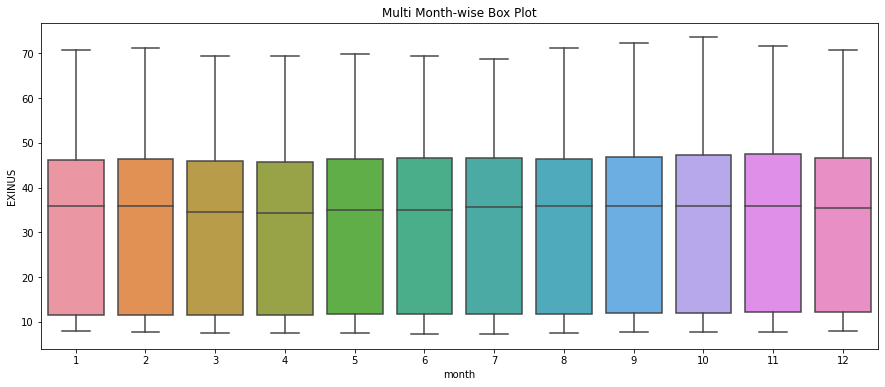

In [23]:
plt.figure(figsize = (15, 6))
sns.boxplot(x = 'month', y = 'EXINUS', data = df).set_title("Multi Month-wise Box Plot")
plt.show()

In [24]:
plt.rcParams.update({'figure.figsize':(15, 6),'figure.dpi':220})

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

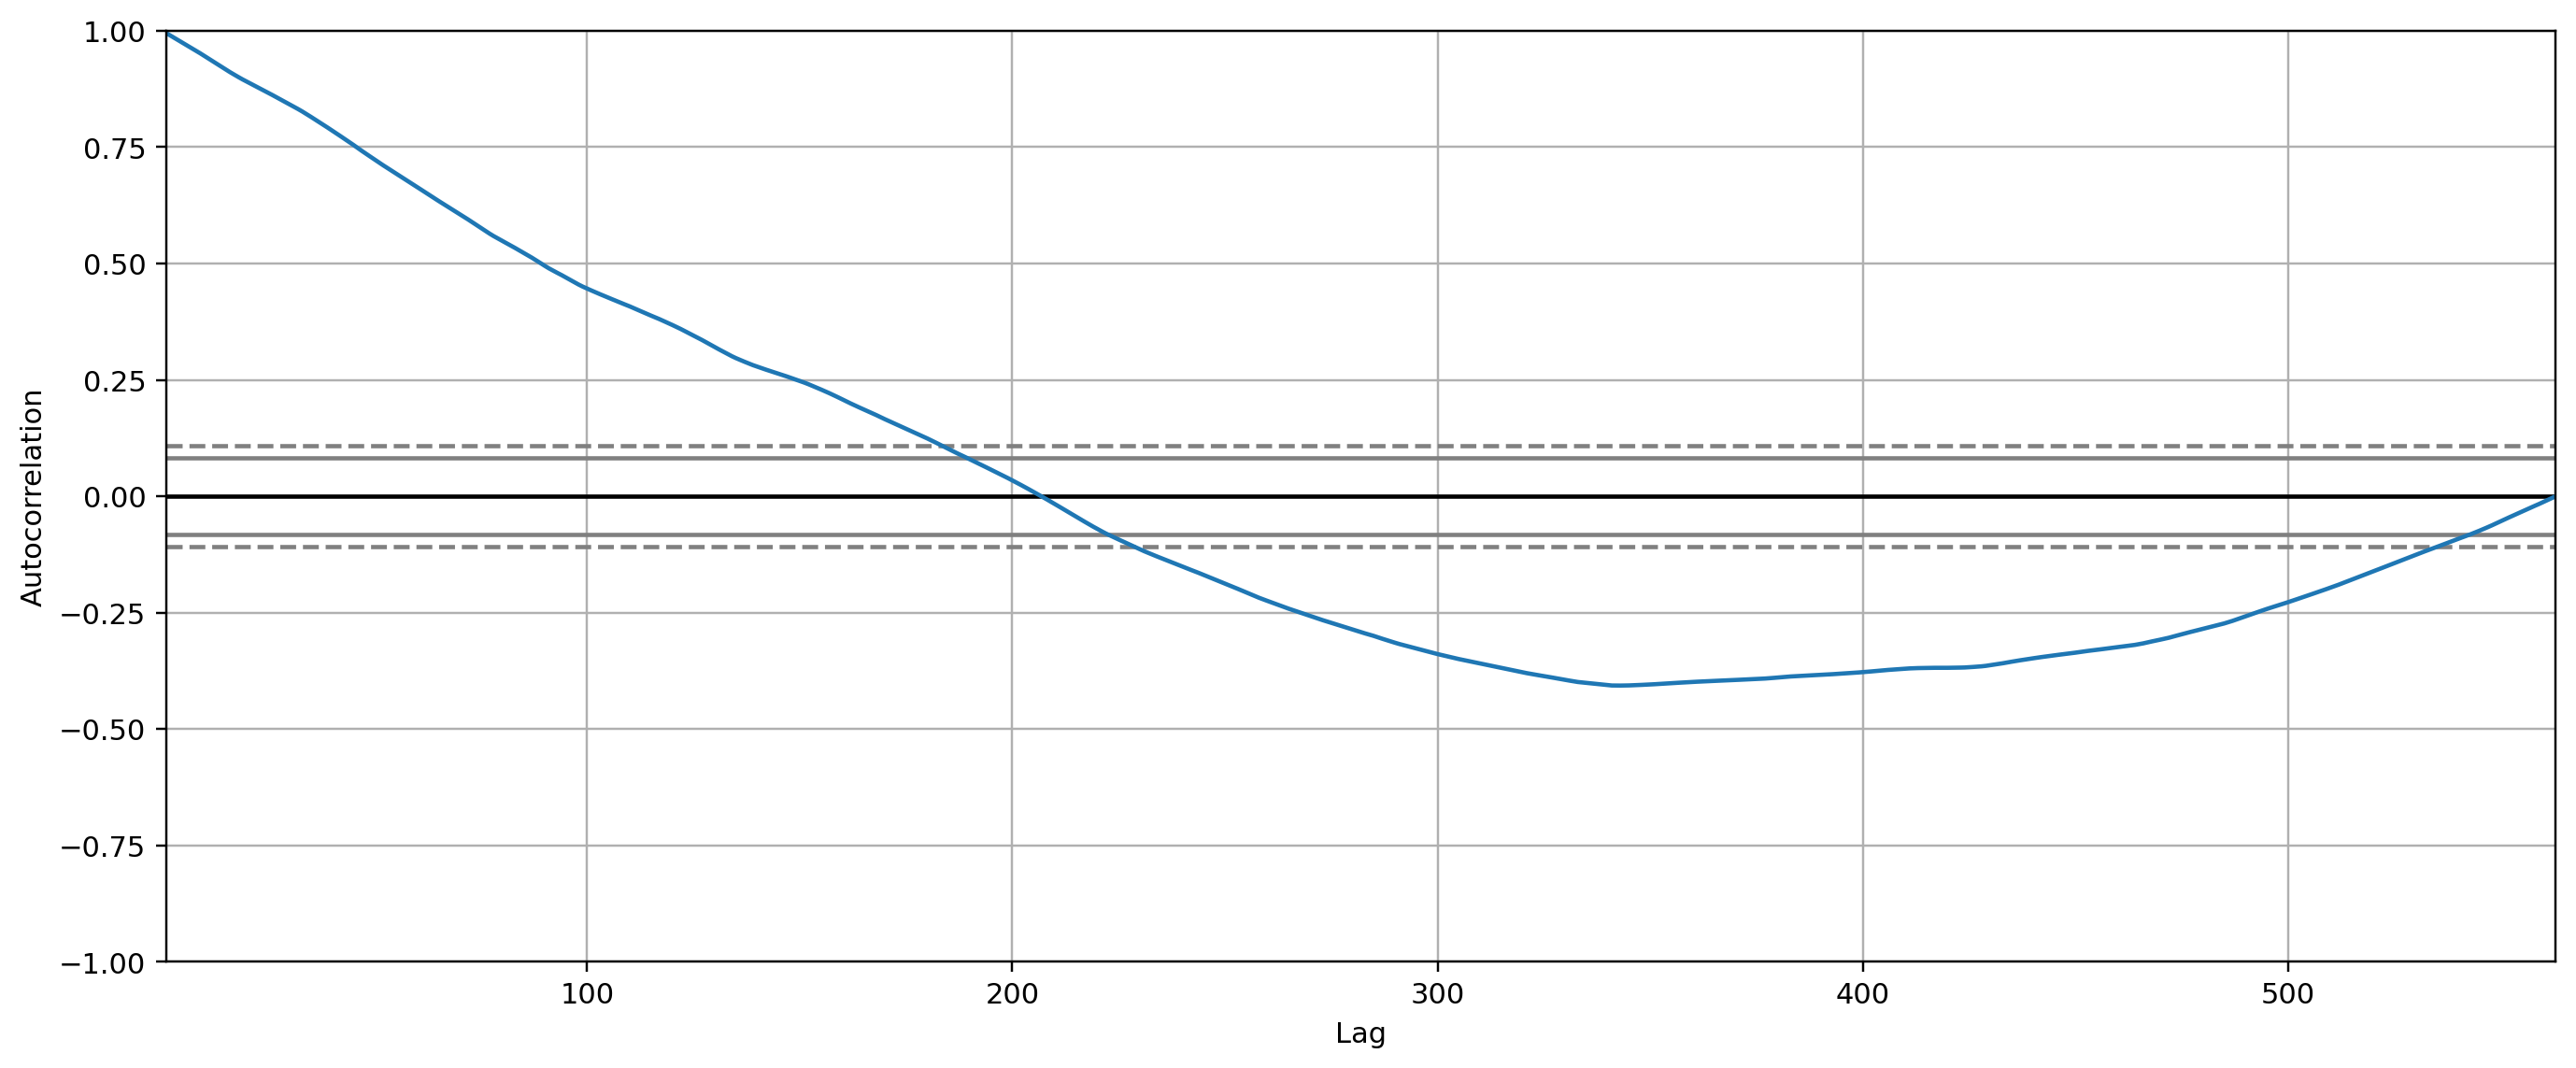

In [25]:
autocorrelation_plot(df.loc[:,'EXINUS'].tolist())

In [26]:
result_mul = seasonal_decompose(df.loc[:, 'EXINUS'], model = 'multiplicative', extrapolate_trend='freq')

In [27]:
result_mul = seasonal_decompose(df.loc[:, 'EXINUS'], model = 'mul')

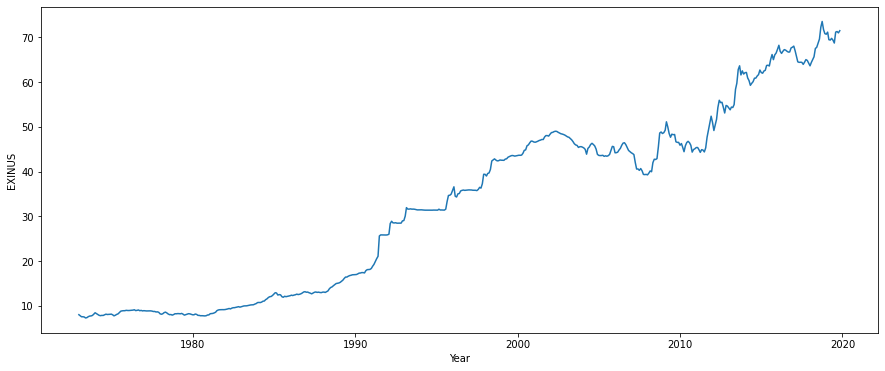

In [50]:
printFunction(result_mul.observed)

<AxesSubplot:xlabel='observation_date'>

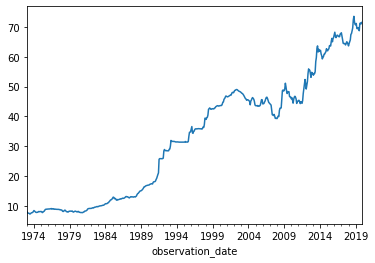

In [46]:
result.observed.plot()

<AxesSubplot:xlabel='observation_date'>

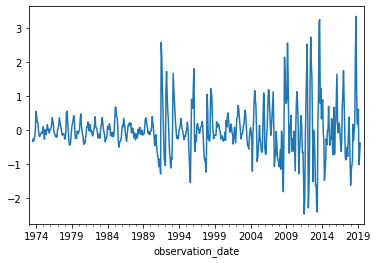

In [47]:
result.resid.plot()

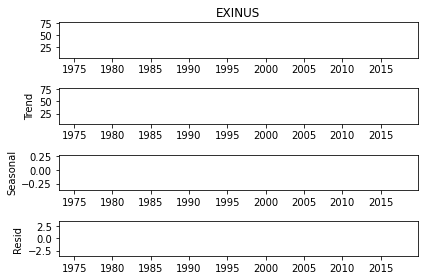

In [44]:
result_mul.plot()

In [29]:
result_mul = seasonal_decompose(df.loc[:, 'EXINUS'], model = 'add', extrapolate_trend='freq')

In [30]:
deseason = df.loc[:,'EXINUS'] - result_mul.seasonal

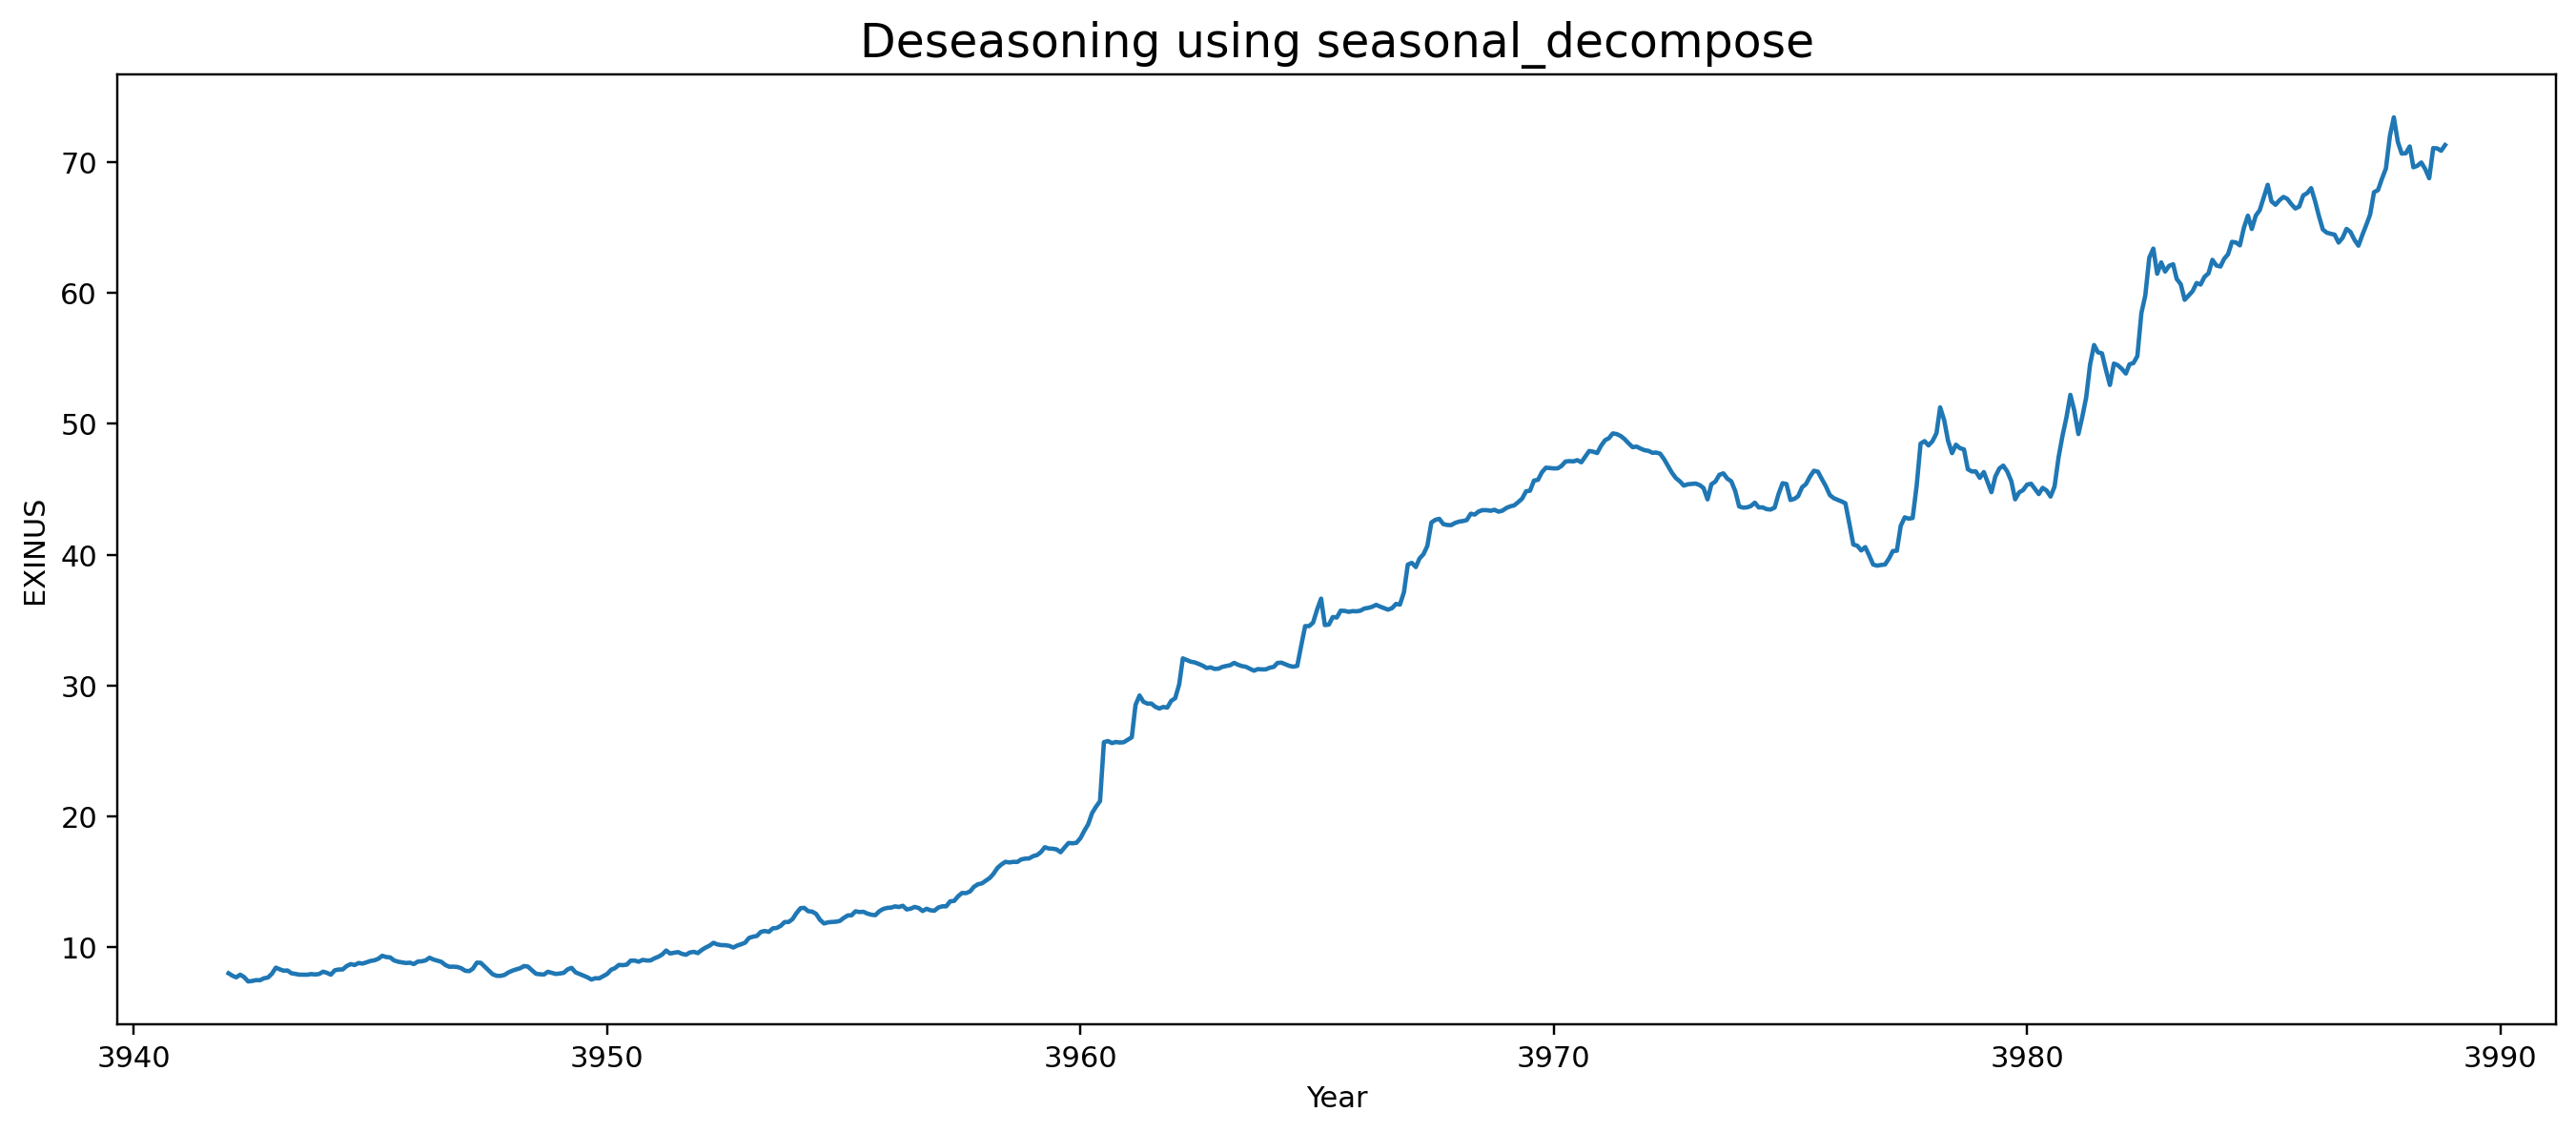

In [31]:
printFunction(deseason, "Deseasoning using seasonal_decompose")

In [32]:
df.head()

,EXINUS,trend,deTrend,month,year
observation_date,,,,,
1973-01-01,8.0041,7.571541,0.432559,1,1973
1973-02-01,7.7538,7.589325,0.164475,2,1973
1973-03-01,7.5465,7.607379,-0.060879,3,1973
1973-04-01,7.5462,7.626077,-0.079877,4,1973
1973-05-01,7.4927,7.645753,-0.153053,5,1973


In [33]:
df.loc[:,'cycle'] = EXINUS_cycle

In [34]:
df.head()

,EXINUS,trend,deTrend,month,year,cycle
observation_date,,,,,,
1973-01-01,8.0041,7.571541,0.432559,1,1973,0.432559
1973-02-01,7.7538,7.589325,0.164475,2,1973,0.164475
1973-03-01,7.5465,7.607379,-0.060879,3,1973,-0.060879
1973-04-01,7.5462,7.626077,-0.079877,4,1973,-0.079877
1973-05-01,7.4927,7.645753,-0.153053,5,1973,-0.153053


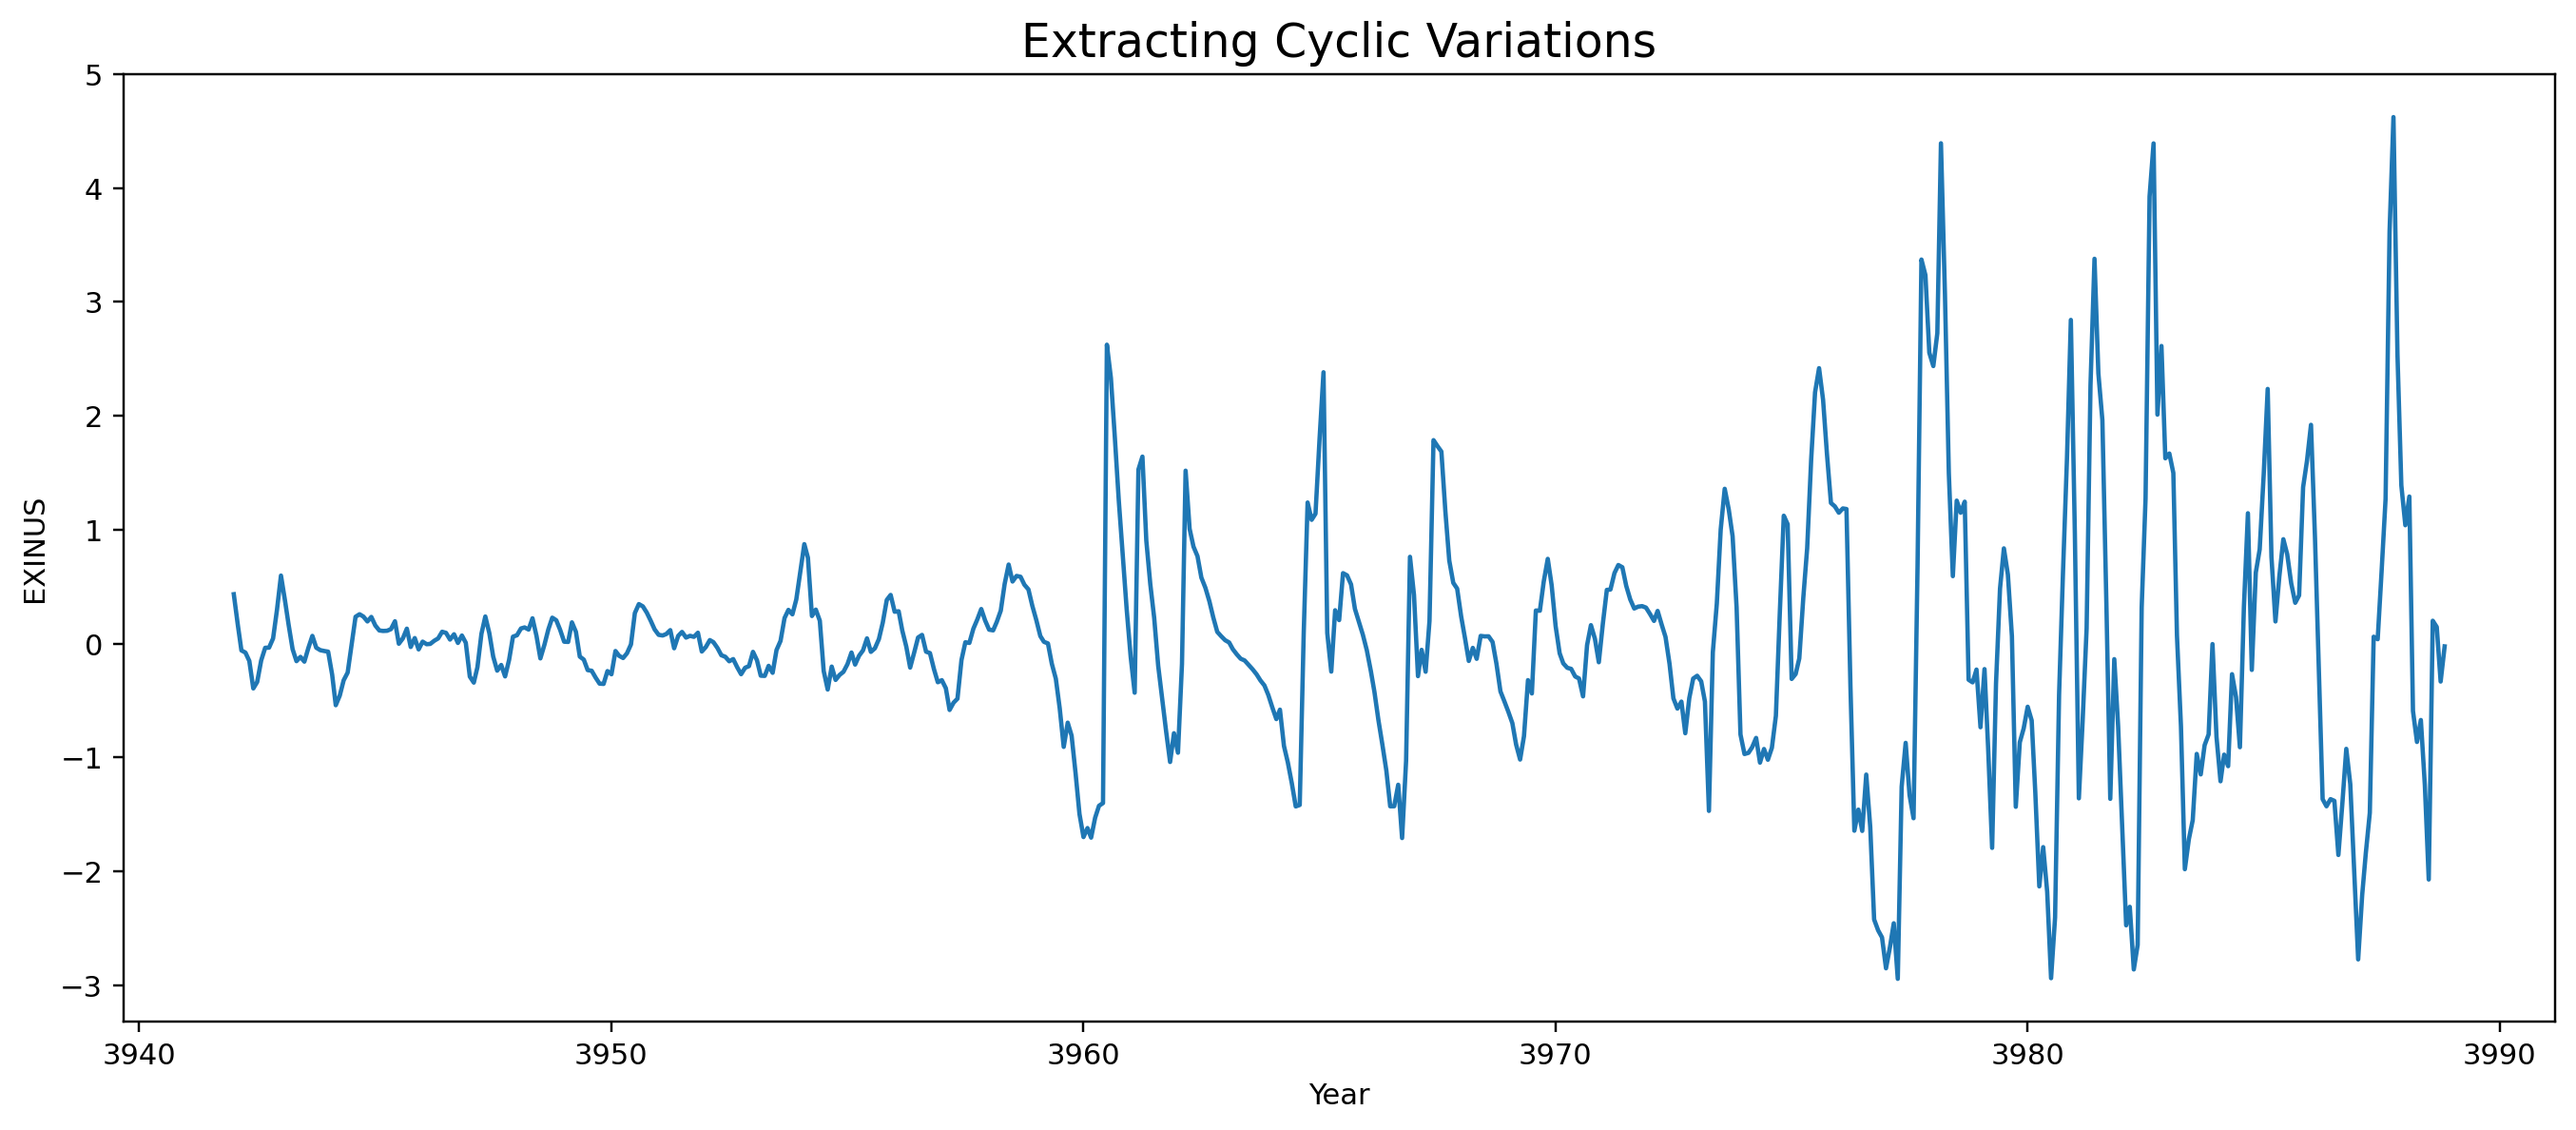

In [35]:
printFunction(df.loc[:,'cycle'], 'Extracting Cyclic Variations')